# Máster en IA y computación cuántica aplicada a los mercados financieros (MIAX)

<img src="https://www.institutobme.es/dam/layout/bme-logo.svg" width="200" height="200" />


## Introducción a la programación Python: Distancias, derivadas y optimización

### 1. Distancias


Recordad que las distancias son una de las partes fundamentales de los modelos de IA, ya que las usaremos para medir como de bien están funcionando los modelos. Por ello, es imprescindible que nos familiaricemos con ellas, las distintas características de cada una y como usarlas y aplicarlas.

Primero vamos a importar la libreria numpy y a poner una semilla para reproducibilidad de resultados.

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(seed=1234)

#### Distancias entre puntos

Considera los siguientes puntos definidos por la matriz A, donde la primera columna son las x's de cada punto y la segunda columna son las y's.

In [5]:
A = np.array([[1,2],[3,1],[-1,2]])
print(A)

[[ 1  2]
 [ 3  1]
 [-1  2]]


**Ejercicio: Pinta los puntos anteriores y marca el origen de un color diferente.**

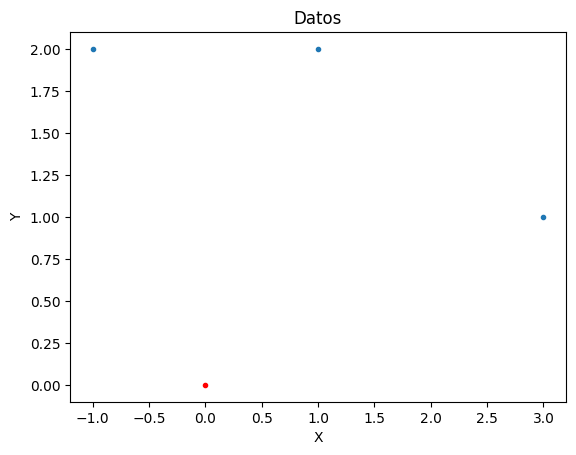

In [ ]:
plt.plot(A[:,0], A[:,1], '.')
plt.plot(0,0,'r.')
plt.title('Datos')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Vamos a calcular la distancia $L_2$, también llamada distancia euclidea, entre los puntos $(−1,2)$  y el origen $(0,0)$. Recuerda la formula, era:

$$D_{L_2}(p_1,p_2) = \sqrt{(x_{p_1} - x_{p_2})^2 + (y_{p_1} - y_{p_2})^2}$$

In [6]:
dist = np.sqrt((A[2,0] - 0)**2 + (A[2,1] - 0)**2)
print(dist)

2.23606797749979


**Ejercicio: Calculas las distancias $L_{0.5}$, $L_1$, $L_2$, $L_3$ y $L_∞$ entre el primer punto de la matriz $A$ y el origen $(0,0)$.**

In [7]:
p = [0.5, 1, 2, 3, np.inf]

for i in p:
  dist = (((A[0,0]-0)**i)+((A[0,1]-0)**i))**(1/i)
  print('Distancia p=', i, '\n', dist)

Distancia p= 0.5 
 5.82842712474619
Distancia p= 1 
 3.0
Distancia p= 2 
 2.23606797749979
Distancia p= 3 
 2.080083823051904
Distancia p= inf 
 1.0


Otra medida de distancia que podemos usar es la llamada distancia coseno (o mejor dicho, la similitud del coseno).

**Ejercicio: Programa la función de similitud de coseno y calcula la similitud entre los puntos 0 y 1 y entre los puntos 2 y 1 de la matriz $A$.**

In [8]:
def cos_sim(a, b):
  return np.dot(a,b)/(np.linalg.norm(a)*np.linalg.norm(b))

print(cos_sim((A[0,0], A[0,1]), (A[1,0], A[1,1])))

print(cos_sim((A[2,0], A[2,1]), (A[1,0], A[1,1])))

0.7071067811865475
-0.14142135623730948


**Ejercicio: ¿Por qué deberiamos hacer 1 - cos_sim()?**

In [9]:
print(cos_sim((A[1,0], A[1,1]), (A[1,0], A[1,1])))

0.9999999999999998


In [10]:
print(1.0 - cos_sim((A[0,0], A[0,1]), (A[1,0], A[1,1])))
print(1.0 - cos_sim((A[2,0], A[2,1]), (A[1,0], A[1,1])))

0.29289321881345254
1.1414213562373094


#### Distancias entre imagenes

Primero, vamos a cargar una imagen.

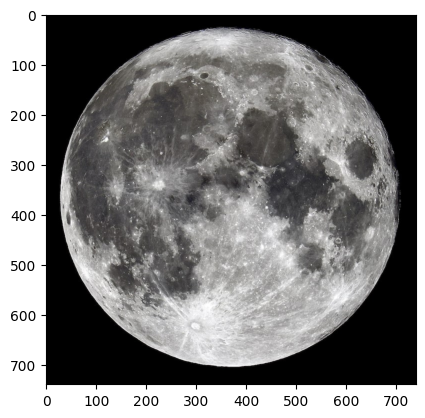

In [ ]:
from skimage import io
img = io.imread('https://img.freepik.com/foto-gratis/hermosa-luna-llena-gris-brillante_181624-59870.jpg?semt=ais_hybrid&w=740&q=80')

plt.imshow(img)
plt.show()

**Ejercicio: Haz la imagen más pequeña, de tamaño $200\times 200$ pixeles.**

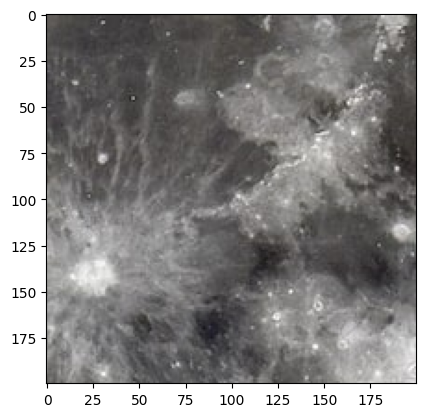

In [ ]:
img = img[200:400,200:400,:]

plt.imshow(img)
plt.show()

Ahora la vamos a dividir en cuadrados de $8\times 8$ pixeles. Vamos a ver cuantos cuadrados caben en cada dimensión.

In [ ]:
img.shape[0]/8, img.shape[1]/8

(25.0, 25.0)

Por lo tanto tenemos $200/8=25$ cuadrados en cada dimensión, por lo que en total habrá:

$2D$ -> $25\times 25=625$

Recuedar que la imagen tiene 3 canales, ¿cuántos pixeles habrá en cada cuadrado?  

$8\times 8\times 3=192$

In [ ]:
cord = []
data = []

for i in np.arange(0, img.shape[1], 8):
  for j in np.arange(0, img.shape[0], 8):
    data.append(img[i:i+8, j:j+8].flatten())
    cord.append([i,j])

In [ ]:
print(data[0].shape)
print(len(data))
print(cord[0])
print(len(cord))

(192,)
625
[np.int64(0), np.int64(0)]
625


Podemos visualizarlos!

array([[105, 101,  98, ...,  76,  72,  69],
       [ 82,  81,  77, ...,  69,  68,  66],
       [ 77,  76,  74, ...,  68,  66,  67],
       ...,
       [178, 177, 175, ..., 186, 185, 183],
       [167, 166, 164, ..., 198, 197, 195],
       [208, 206, 207, ..., 221, 219, 220]], dtype=uint8)
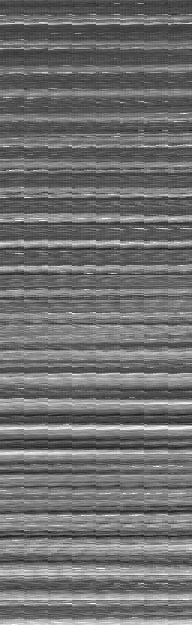

In [ ]:
data = np.array(data)
data

**Ejercicio: Calcula la distancia L2 entre todos los patches (cuadrados en los que hemos dividido la imagen).**

In [ ]:
D = np.zeros((data.shape[0],data.shape[0]))  # Matrix to save all the distances
p = 2

for i in range(0, data.shape[0]):
  for j in range(0, data.shape[0]):
    D[i,j] = (np.mean((data[i,:]-data[j,:])**p))**(1/p)

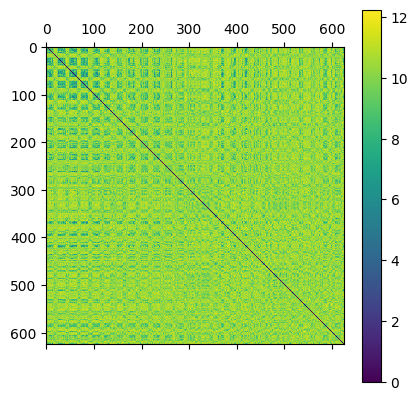

In [ ]:
plt.matshow(D)
plt.colorbar()
plt.show()

**Ejercicio: ¿Qué representa la diagonal y por qué tiene un color tan distinto?**

Vamos a seleccionar el primer cuadrado y ver las distancias entre el y todos los demás cuadrados.

In [ ]:
D_0 = D[0,:]

print(D_0.shape)

(625,)


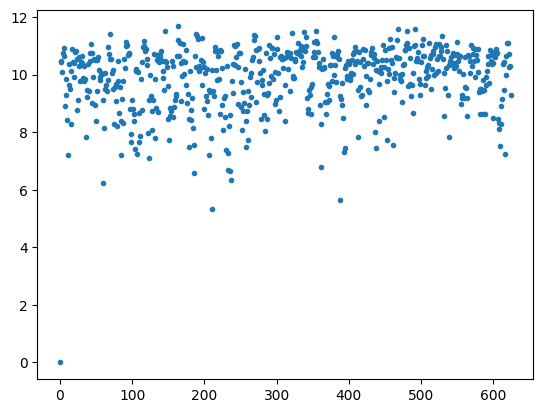

In [ ]:
plt.plot(D_0,'.')
plt.show()

#### Distancias humanas entre imagenes

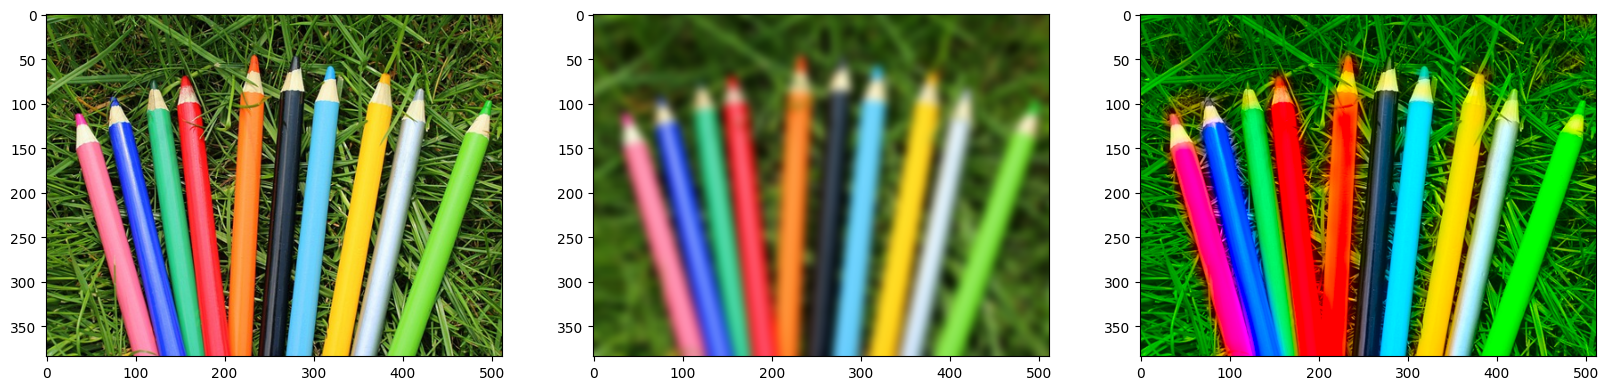

In [ ]:
import tensorflow as tf
from skimage import io

img1 = io.imread('https://database.mmsp-kn.de/uploads/1/1/9/4/119489445/i23-01-01.png')
img2 = io.imread('https://database.mmsp-kn.de/uploads/1/1/9/4/119489445/i23-01-05.png')
img3 = io.imread('https://database.mmsp-kn.de/uploads/1/1/9/4/119489445/i23-04-02.png')

fig, ax = plt.subplots(1,3, figsize=(20,5))
ax[0].imshow(img1)
ax[1].imshow(img2)
ax[2].imshow(img3)
plt.show()

**Ejercicio: Calcula la distancia L2 entre la imagen 1 y la imagen 2 y entre la imagen 1 y la imagen 3.**

In [ ]:
d_12 = np.sqrt(np.mean((img1-img2)**2))
d_13 = np.sqrt(np.mean((img1-img3)**2))
print(d_12, d_13)

9.75154140710345 9.637075800286555


Pero ahora vamos a calcular la distancia humana entre ellas!

In [ ]:
d_human_12 = 1.0 - tf.image.ssim_multiscale(img1=img1, img2=img2, max_val=255.)
d_human_13 = 1.0 - tf.image.ssim_multiscale(img1=img1, img2=img3, max_val=255.)
print(d_human_12.numpy(), d_human_13.numpy())

0.30011493 0.31841725


Tambien podemos usar otros modelos más modernos que el SSIM, como por ejemplo LPIPS.

<img title="a title" alt="Alt text" src="https://camo.githubusercontent.com/a76b7c735cbb76851bab9c7ba7b7cabca3f378b56e504e2d99d09be6f49cb6bd/68747470733a2f2f726963687a68616e672e6769746875622e696f2f5065726365707475616c53696d696c61726974792f696e6465785f66696c65732f666967315f76322e6a7067">


In [ ]:
!pip install lpips

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 1.6 MB/s eta 0:00:00


In [ ]:
import lpips
metric = lpips.LPIPS(net='alex')

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


100%|██████████| 233M/233M [00:04<00:00, 56.0MB/s]


Loading model from: /usr/local/lib/python3.12/dist-packages/lpips/weights/v0.1/alex.pth


In [ ]:
import torch

img_1_torch = torch.from_numpy(img1).permute(2,0,1).unsqueeze(0).float()
img_2_torch = torch.from_numpy(img2).permute(2,0,1).unsqueeze(0).float()
img_3_torch = torch.from_numpy(img3).permute(2,0,1).unsqueeze(0).float()

d_lpips_12 = metric(img_1_torch, img_2_torch)
d_lpips_13 = metric(img_1_torch, img_3_torch)

print(d_lpips_12.item(), d_lpips_13.item())

0.5014537572860718 0.23561732470989227


### 2. Funciones matemáticas


Recordemos que los modelos de IA no son más que funciones matemáticas: Tienen unas entradas, realizan unas operaciones con ellas y devuelven una salida. Las operaciones matemáticas que realizan dependen de sus parametros, sus constantes.

Vamos a definir, por ejemplo, la siguiente función:

$$f(x) = 3x^2 - 4$$

In [2]:
def function_1d(x):
  return 3*x**2 - 4

**Ejercicio: Genera un vector $x$ que vaya entre -2 y +2 y tenga 100 puntos. Calcula el valor de $f(x)$ para todos estos valores del vector $x$.**

In [ ]:
x = np.linspace(-2, 2, 100)
y = function_1d(x)

**Ejercicio: Representa los valores de $x$ y la salida de la función para estos valores, $y$.**

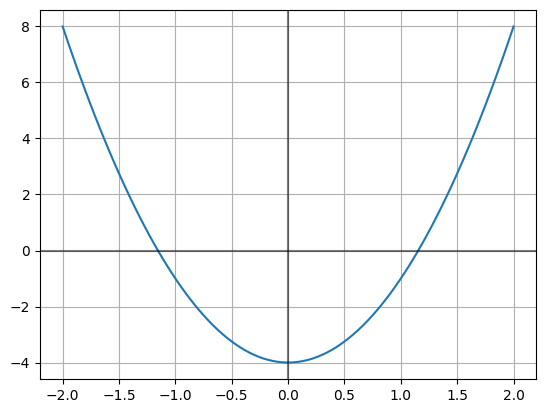

In [ ]:
plt.plot(x, y)
plt.axhline(y=0, color='k', alpha=0.5)
plt.axvline(x=0, color='k', alpha=0.5)
plt.grid()
plt.show()

**Ejercicio: Define ahora la siguiente función que tiene dos entradas y devuelva un solo número:**

$$f(x,y)=x^2+y^2$$

In [ ]:
def function_2d(x,y):
  return x**2 + y**2

Para representarlo ahora necesitamos hacer un "meshgrid", una especie de rejilla (matriz) donde en cada punto tengamos las coordenadas  $x$  e  $y$.

In [ ]:
x_range = np.linspace(-2, 2, 100)
y_range = np.linspace(-2, 2, 100)
x, y = np.meshgrid(x_range, y_range)

**Ejercicio: Calcula el valor de la función en todos los puntos y representalos.**

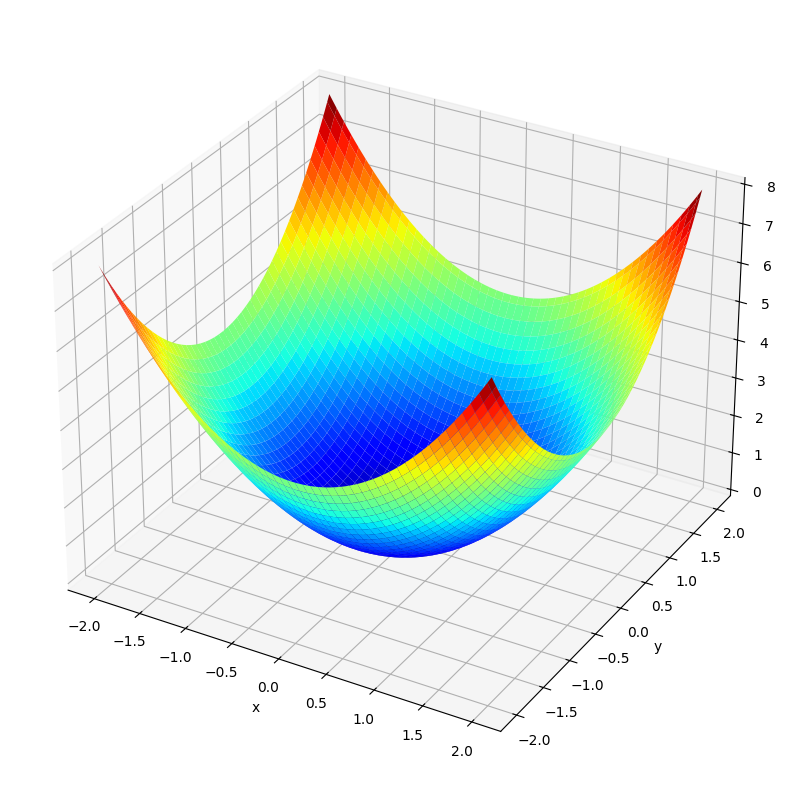

In [ ]:
z = function_2d(x, y)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection = '3d')
ax.plot_surface(x, y, z, cmap='jet')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

Para representarlo ahora necesitamos un gráfico en 3 dimensiones, ya que las variables x e y son las de entrada a la función. El valor de la función para cada par de valores viene representado por la altura en el eje z.

### 3. Derivadas



Las derivadas son una herramienta matemática imprescindible, ya que nos da información sobre como aumenta/disminuye el valor de una función al cambiar su entrada.

Primero vamos a definir una función igual que antes.

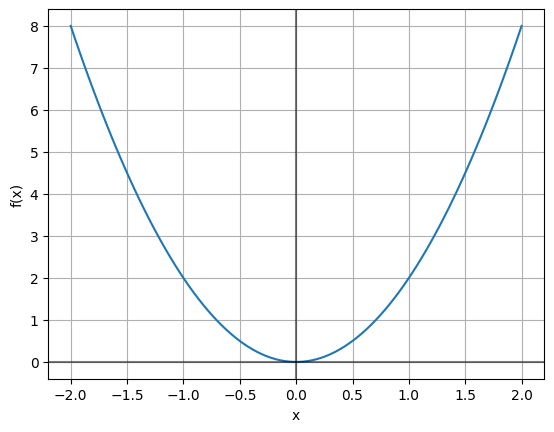

In [ ]:
def f(x):
    return 2*x**2


x = np.linspace(-2, 2, 100)
y = f(x)

plt.plot(x,y)
plt.axhline(y=0, color='k', alpha=0.5)
plt.axvline(x=0, color='k', alpha=0.5)
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

Vamos a ver como calculamos la pendiente de la función en un punto, por el ejemplo en el  $x=0.5$ . Vamos a ir haciendo aproximaciones cada vez mejores.

In [ ]:
x1 = 1.0
p2_delta = 1
x2 = x1 + p2_delta

y1 = f(x1)
y2 = f(x2)

approximate_derivative = (y2 - y1) / (x2 - x1)
print(approximate_derivative)

6.0


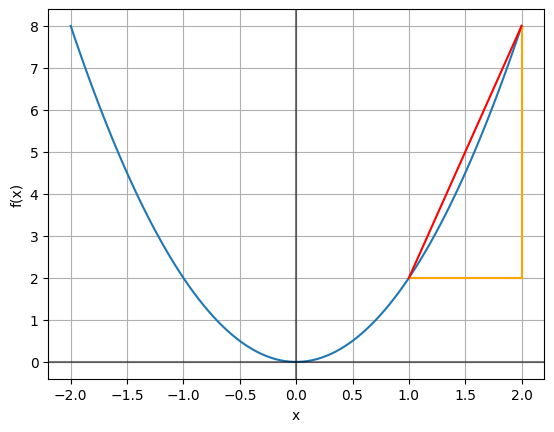

In [ ]:
plt.plot(x,y)
plt.axhline(y=0, color='k', alpha=0.5)
plt.axvline(x=0, color='k', alpha=0.5)
plt.plot([x1,x2],[y1,y1], color='orange')
plt.plot([x2,x2],[y1,y2], color='orange')
plt.plot([x1,x2],[y1,y2], color='red')
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

Ahora vamos a ir haciendo estos pasos cada vez más pequeños!

For delta 1, the derivative is 6.0
For delta 0.5, the derivative is 5.0
For delta 0.25, the derivative is 4.5
For delta 0.1, the derivative is 4.2
For delta 1e-05, the derivative is 4.000020000001655


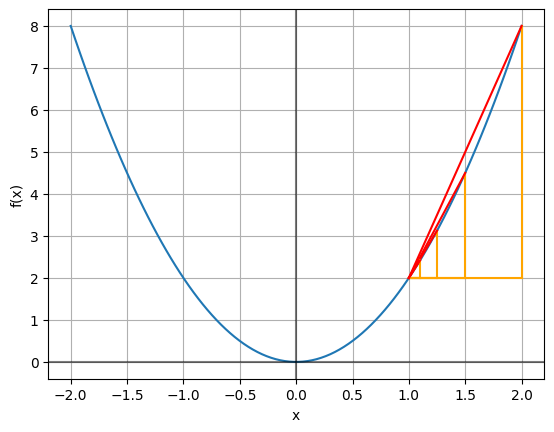

In [ ]:
plt.plot(x,y)
plt.axhline(y=0, color='k', alpha=0.5)
plt.axvline(x=0, color='k', alpha=0.5)
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')

for p2_delta in [1, 0.5, 0.25, 0.1, 0.00001]:
  x1 = 1.0
  x2 = x1 + p2_delta

  y1 = f(x1)
  y2 = f(x2)

  approximate_derivative = (y2 - y1) / (x2 - x1)
  print(f'For delta {p2_delta}, the derivative is {approximate_derivative}')

  plt.plot([x1,x2],[y1,y1], color='orange')
  plt.plot([x2,x2],[y1,y2], color='orange')
  plt.plot([x1,x2],[y1,y2], color='red')

plt.show()

Como la función es  $f(x)=2⋅x^2$  podemos calcular su derivada facilmente:  $f′(x)=4⋅x$

Vamos a pintar la derivada y la función.

In [ ]:
def f_d1(x):
    return 4*x

**Ejercicio: Representa en el mismo gráfico la función y su derivada.**

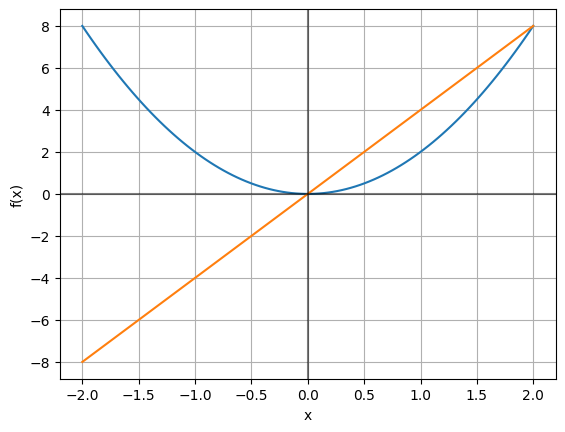

In [ ]:
x = np.linspace(-2, 2, 100)
y = f(x)
y_d1 = f_d1(x)

plt.plot(x,y)
plt.plot(x,y_d1)
plt.axhline(y=0, color='k', alpha=0.5)
plt.axvline(x=0, color='k', alpha=0.5)
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

La derivada nos esta dando cual es la pendiente de una recta tangente a la función en cada punto. Vamos a verlo para el punto  $x=1$.

In [ ]:
x_1 = 1
y_1 = f(x_1)
print(x_1, y_1)

1 2


La derivada nos da la pendiende de la recta que va a pasar por ese punto.

In [ ]:
pendiente = f_d1(x_1)
print(pendiente)

4


In [ ]:
recta = pendiente * (x - x_1) + y_1

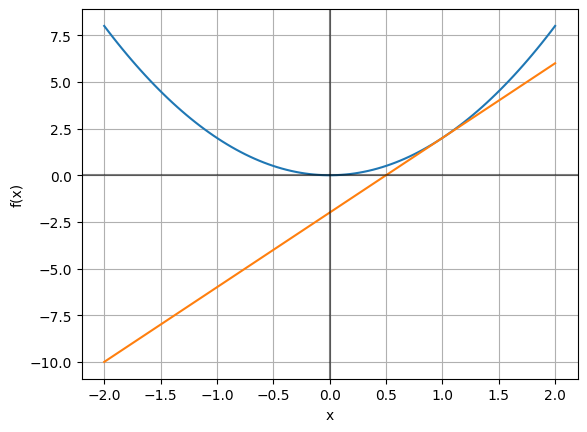

In [ ]:
plt.plot(x,y)
plt.plot(x,recta)
plt.axhline(y=0, color='k', alpha=0.5)
plt.axvline(x=0, color='k', alpha=0.5)
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

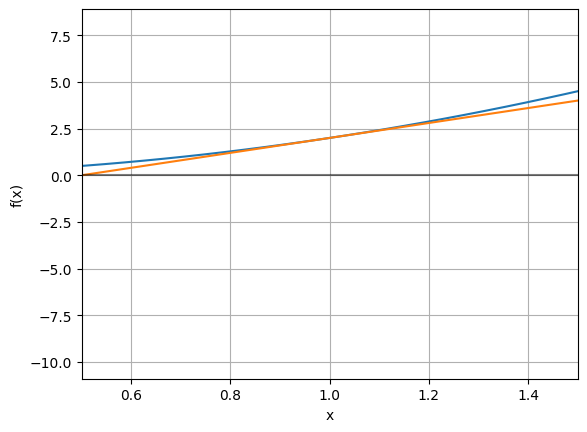

In [ ]:
plt.plot(x,y)
plt.plot(x,recta)
plt.axhline(y=0, color='k', alpha=0.5)
plt.axvline(x=0, color='k', alpha=0.5)
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.xlim([0.5,1.5])
plt.show()

**Ejercicio: Cambia la pendiente y comprueba como la recta no es tangente!**

In [ ]:
recta_mala = (pendiente/2) * (x - x_1) + y_1

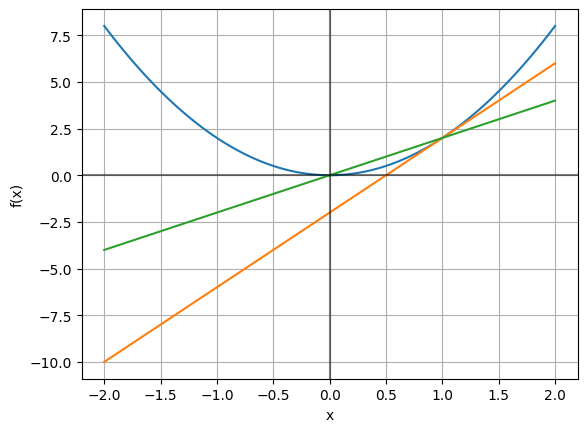

In [ ]:
plt.plot(x,y)
plt.plot(x,recta)
plt.plot(x,recta_mala)
plt.axhline(y=0, color='k', alpha=0.5)
plt.axvline(x=0, color='k', alpha=0.5)
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

**Ejercicio: Cambia del punto  $x=1$  al punto  $x=0$  y calcula la recta tangente. ¿Cómo es? ¿Por qué?**

In [ ]:
x_1 = 0
y_1 = f(x_1)
print(x_1, y_1)

0 0


In [ ]:
pendiente_0 = f_d1(x_1)
print(pendiente_0)

0


In [ ]:
recta = pendiente_0 * (x - x_1) + y_1

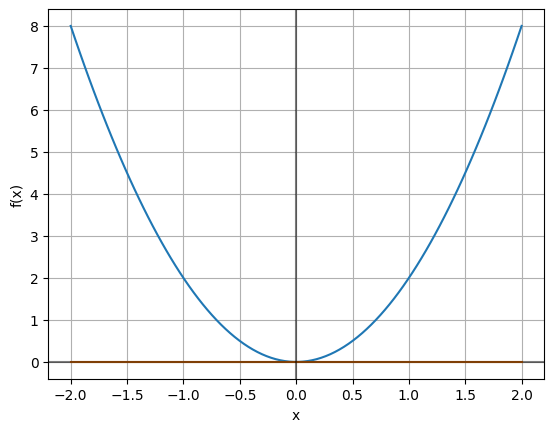

In [ ]:
plt.plot(x,y)
plt.plot(x,recta)
plt.axhline(y=0, color='k', alpha=0.5)
plt.axvline(x=0, color='k', alpha=0.5)
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

### 4. Gradientes

El gradiente es la derivada de las funciones que tienen más de una entrada. No es más que calcular la derivada respecto a cada una de las entradas (es decir, como cambia la función cuando cambiamos una de las entradas dejando el resto fijas).

Vamos a calcular el gradiente de la función de antes que admitia vectores como entrada y su salida era un escalar.

In [ ]:
def function_2d(x,y):
  return x**2 + y**2

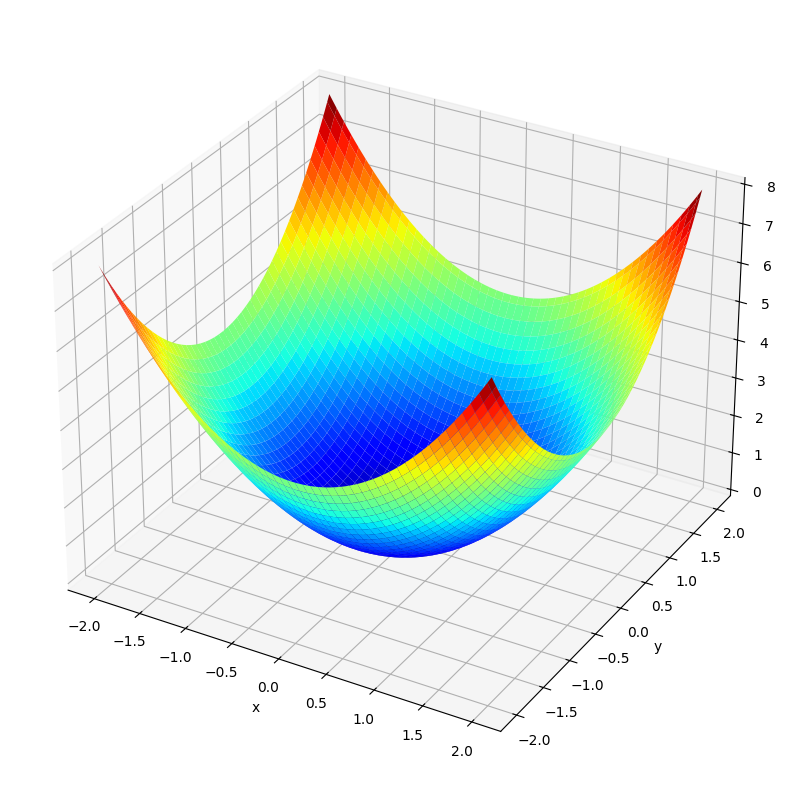

In [ ]:
x_range = np.linspace(-2, 2, 100)
y_range = np.linspace(-2, 2, 100)
x, y = np.meshgrid(x_range, y_range)

z = function_2d(x, y)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection = '3d')
ax.plot_surface(x, y, z, cmap='jet')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

Calculamos su gradiente y su valor para un par de puntos. Recordad que no es más que la derivada respecto de cada entrada, puesto en forma de vector.

In [ ]:
def function_2d_d1(x,y):
  return 2*x, 2*y

In [ ]:
x1 = [0,1]
x2 = [1,-1.5]

grad_1 = function_2d_d1(x1[0], x1[1])
print(f'En el punto x={x1[0]}, y={x1[1]}, el gradiente es grad(x1)={grad_1}')

grad_2 = function_2d_d1(x2[0], x2[1])
print(f'En el punto x={x2[0]}, y={x2[1]}, el gradiente es grad(x1)={grad_2}')

En el punto x=0, y=1, el gradiente es grad(x1)=(0, 2)
En el punto x=1, y=-1.5, el gradiente es grad(x1)=(2, -3.0)


**Representa encima de la función los dos gradientes, cada uno en el punto en el que lo has calculado. ¡Usa la función contour para verlo mejor!**

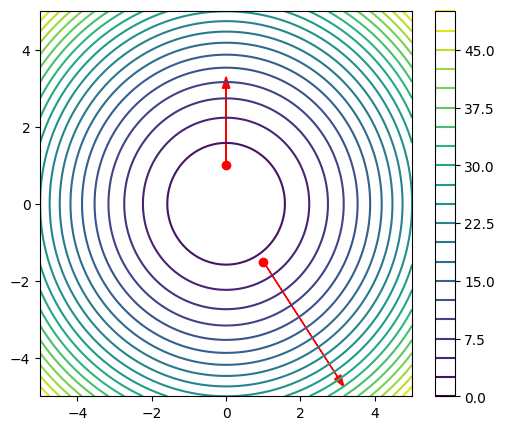

In [ ]:
x_range, y_range = np.linspace(-5, 5, 100), np.linspace(-5, 5, 100)
x, y = np.meshgrid(x_range, y_range)

z = function_2d(x, y)

fig, ax = plt.subplots(figsize=(6,5))
cont = ax.contour(x, y, z, levels=20)
fig.colorbar(cont, ax=ax)
ax.plot(x1[0], x1[1], 'ro')
plt.arrow(x1[0], x1[1], float(grad_1[0]), float(grad_1[1]), head_width=0.2, head_length=0.3, fc='r', ec='r')
plt.arrow(x2[0], x2[1], float(grad_2[0]), float(grad_2[1]), head_width=0.2, head_length=0.3, fc='r', ec='r')
ax.plot(x2[0], x2[1], 'ro')
plt.show()

### 5. Diferenciación automática

La diferenciación automática nos permite, usando las librerias existentes, calcular las derivadas y gradientes de las funciones de forma automática, sin necesidad de hacer los calculos a mano.

Podriamos usar cualquiera de las librerias que hemos visto, como Tensorflow, Pytorch, Jax... En este caso nos vamos a quedar con Jax, por su similitud con numpy, pero el código sería similar en todas ellas, simplemente adaptandolo a sus propias funciones y forma de escribirlo.

Empezamos importando Jax:

In [ ]:
import jax
import jax.numpy as jnp

In [ ]:
# Definimos la función
def f(x):
    return x**2

Calcular la derivada de una función es tan fácil como decirle ``.grad()``

In [ ]:
f_d1 = jax.grad(f)
f_d1

<function __main__.f(x)>

Aqui nuestra función en $f(x)=x^2$ y vamos a calcular la derivada en el punto $x=3$.

La derivada será $f′(x)=2⋅x$, por lo que en $x=3$ tendremos $f'(x=3) = 2⋅3 = 6$

In [ ]:
x = 3.0
print(f_d1(x))

6.0


``jax.grad`` devuelve una función que calcula la derivada respecto al primer argumento de la función.

Aqui hemos hecho un ejemplo de derivada, pero funciona igual para gradientes (más dimensiones). Vamos a verlo:

Tenemos la función $f(x) = f(x_0, x_1) = x_0^2 + 3\cdot x_1 + 1$

In [ ]:
# Definimos la función
def f(x):
    return x[0]**2 + 3.0*x[1] + 1.0

x = jnp.array([2.0, 3.0])

print(f(x))

14.0


En este caso la función tiene 2 entradas, $x_0$ y $x_1$, por lo que el gradiente será un vector de dos dimensiones, con la derivada respecto de cada entrada. Haciendolo a mano tendremos que:

$$f'(x) = (2.0 \cdot x_0, 3)$$



In [ ]:
# Gradiente
grad_f = jax.grad(f)

# La evaluamos en el punto x = (2, 3)
x = jnp.array([2.0, 3.0])
grad_x = grad_f(x)
print(grad_x)

[4. 3.]


Pero tened en cuenta una cosa, normalmente definiremos los modelos con dos entradas, por un lado los inputs ($x$) y por otro sus parametros ($\theta$)!
Y lo que querremos hacer en realidad es calcular el gradiente **respecto de los parametros**, no respecto de los inputs. Definiendola de esta forma, la función es:

$f(x, w) = w_0\cdot x_0^2 + w_1\cdot x_1 + w_2$

Donde, para recuperar la misma función que teniamos tendremos que usar $w_0 = 1$, $w_1 = 3$ y $w_2 = 1$.

In [ ]:
def f(w, x):
    return w[0]*x[0]**2 + w[1]*x[1] + w[2]

x = jnp.array([2.0, 3.0])
w = jnp.array([1.0, 3.0, 1.0])

print(f(w, x))

14.0


Y ahora podemos calcular el gradiente respecto de los inputs ($x$), como antes. Solo tenemos que decirle que calcule el gradiente respecto de la segunda entrada que tiene la función!

In [ ]:
# Gradiente respecto de x
grad_f = jax.grad(f, argnums=1)

# La evaluamos en el punto x = (2, 3)
x = jnp.array([2.0, 3.0])
w = jnp.array([1.0, 3.0, 1.0])

grad_x = grad_f(w, x)
print(grad_x)

[4. 3.]


Pero tambien podemos hacer respecto de los parametros ($\theta$)! En este caso es:

$$f'_w(x) = (w_0^2, x_1, 1)$$

In [ ]:
# Gradiente respecto de x
grad_f = jax.grad(f, argnums=0)

# La evaluamos en el punto x = (2, 3)
x = jnp.array([2.0, 3.0])
w = jnp.array([1.0, 3.0, 1.0])

grad_x = grad_f(w, x)
print(grad_x)

[4. 3. 1.]


Vamos a hacer ahora un ejemplo similar en Pytorch para que veais como sería en otra libreria.

Primero hemos de definir las entradas y los parametros y, en este caso, tenemos que indicar de cuales vamos a querer calcular los gradientes.

Vamos a usar otra función para este ejemplo: $f(x,w) = w_0\cdot x_0 + w_1\cdot x_1 + w_2\cdot x_2$

y como $w=(1,2,3)$ y $x=(1,2,3)$, en este caso tenemos que $f(x,w) = 14$.

In [ ]:
import torch

x = torch.tensor([[1.,2.,3.]])
w = torch.tensor([[1.,2.,3.]], requires_grad=True)

y = x @ torch.transpose(w, 0, 1)
print(y)

tensor([[14.]], grad_fn=<MmBackward0>)


Para acceder al valor directamente:

In [ ]:
print(y.detach().numpy())

[[14.]]


Pero si hacemos .grad nos devuelve None!

In [ ]:
print(w.grad)

None


Tenemos que pedirle antes que calcule el gradiente

In [ ]:
# Compute gradients
y.backward()

In [ ]:
print(w.grad)

tensor([[1., 2., 3.]])


### 6. Optimización

Vamos a ver como podemos usar las derivadas y los gradientes para encontrar los puntos extremos de una función matemática. Vamos a empezar por funciones 1D (con una sola entrada) usando la derivada y después veremos veremos lo mismo para funciones 2D usando el gradiente.

#### 5.1 Optimización 1D (derivada)

Vamos a buscar el mínimo de la función $f(x) = x^2 - 6x + 5$

Por una parte podemos hacerlo a mano:

- 1 Calculamos la derivada $f'(x) = 2x - 6$

- 2 La igualamos a cero $2x-6=0$

- 3 Resolvemos la ecuación

\begin{equation}
\begin{split}
2x-6  & = & 0 \\
2x  & = & 6 \\
x & = & 3 \\
\end{split}
\end{equation}

Por lo que el mínimo (o máximo) está en $x=3$

**Ejercicio: Representa la función para ver donde está el mínimo.**

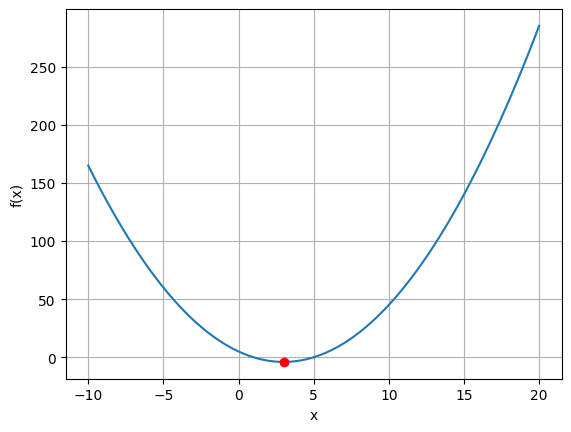

In [ ]:
def f(x):
  return x**2 - 6*x + 5

x = np.linspace(-10,20,100)
y = f(x)

plt.plot(x,y)
plt.plot(3,f(3),'ro')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()
plt.show()

Vamos a hacerlo ahora por descenso por gradiente.

1. Empezamos por un valor aleatorio de  x

2. Calculamos la derivada  f′(x)

3. Nos movemos en la dirección opuesta a la derivada.

En este caso es la opuesta porque estamos buscando el mínimo!

In [ ]:
def f(x):
  return x**2 - 6*x + 5

def f_d(x):
  return 2*x - 6

x = np.linspace(-10,20,100)
y = f(x)

# Punto de inicio
start = 15

# Derivada
dev = f_d(start)
print(dev)

# Nos movemos en esa dirección
x_new = start - dev
print(x_new)

24
-9


**Ejercicio: Representa el punto de inicio y el punto final encima de la función. Marca donde está el mínimo real.**

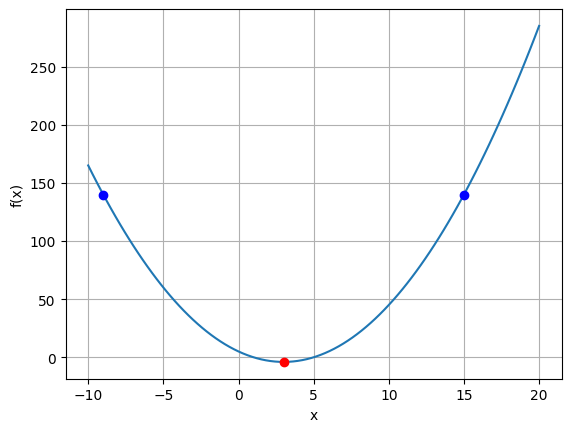

In [ ]:
plt.plot(x,y)
plt.plot(3,f(3),'ro')
plt.plot(15,f(15),'bo')
plt.plot(-9,f(-9),'bo')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()
plt.show()

Nos hemos pasado el mínimo! Para solucionar esto se introduce el tamaño del salto (learning rate o alpha). Hay que elegirlo cuidadosamente, si es muy pequeño tardará mucho, si es muy grande igual nunca puede llegar.

In [ ]:
x_prueba = 15 # initial point

learning_rate = 0.01

new_x = []
new_x_fvalue = []

for i in range(200):
  f_value = f(x_prueba)

  new_x.append(x_prueba)
  new_x_fvalue.append(f_value)

  dev = f_d(x_prueba)
  x_prueba = x_prueba - learning_rate*dev

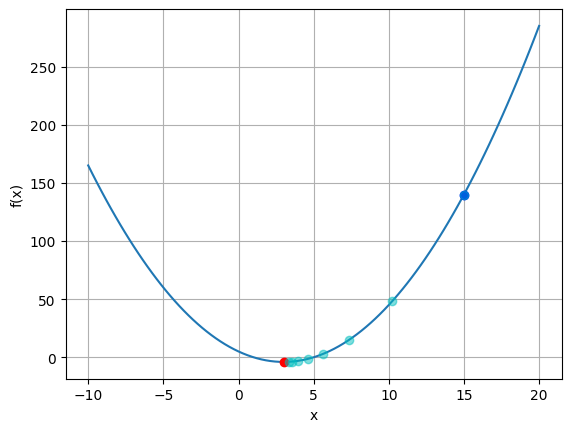

In [ ]:
plt.plot(x,y)
plt.plot(3,f(3),'ro')
plt.plot(15,f(15),'bo')
for i in range(len(new_x)):
  if i%25==0:
    plt.plot(new_x[i],new_x_fvalue[i],'co', alpha=0.5)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()
plt.show()

**Ejercicio: Prueba a cambiar el learning rate y a empezar desde otro punto. ¿Sigue convergiendo al mínimo?**

In [ ]:
x_prueba = 15 # initial point

learning_rate = 0.05

new_x = []
new_x_fvalue = []

for i in range(200):
  f_value = f(x_prueba)

  new_x.append(x_prueba)
  new_x_fvalue.append(f_value)

  dev = f_d(x_prueba)
  x_prueba = x_prueba - learning_rate*dev

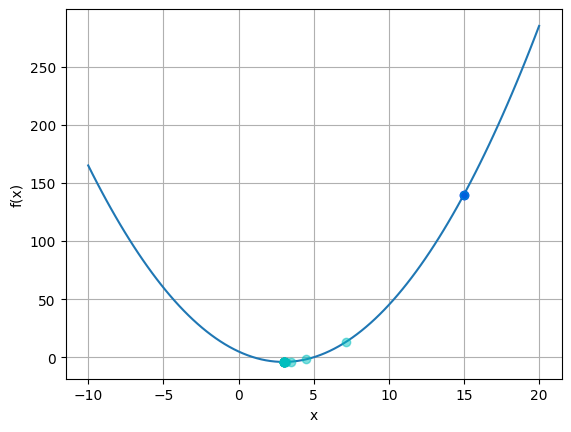

In [ ]:
plt.plot(x,y)
plt.plot(3,f(3),'ro')
plt.plot(15,f(15),'bo')
for i in range(len(new_x)):
  if i%10==0:
    plt.plot(new_x[i],new_x_fvalue[i],'co', alpha=0.5)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()
plt.show()

**Ejercicio: Prueba otro punto de inicio y learning rate.**

In [ ]:
x_prueba = -10 # initial point

learning_rate = 0.001

new_x = []
new_x_fvalue = []

for i in range(200):
  f_value = f(x_prueba)

  new_x.append(x_prueba)
  new_x_fvalue.append(f_value)

  dev = f_d(x_prueba)
  x_prueba = x_prueba - learning_rate*dev

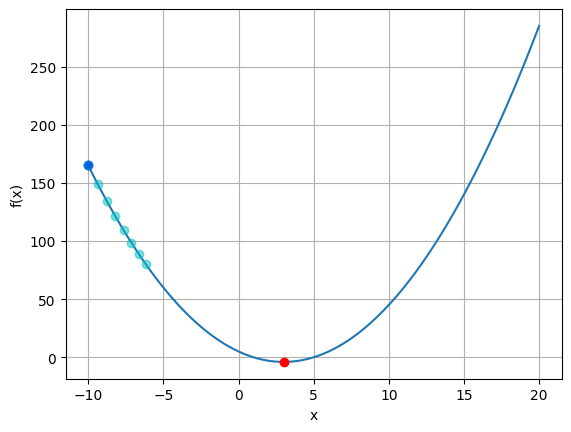

In [ ]:
plt.plot(x,y)
plt.plot(3,f(3),'ro')
plt.plot(-10,f(-10),'bo')
for i in range(len(new_x)):
  if i%25==0:
    plt.plot(new_x[i],new_x_fvalue[i],'co', alpha=0.5)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()
plt.show()

¿Cómo se elige el learning rate adecuado? Prueba y error.

Luego hay varias opciones:

- Constante durante todos los pasos.
- Ir disminuyendolo con el número de pasos (al acercarse al mínimo)
- En cada paso, buscar el mejor learning rate.
- Aumentarlo al principio y luego ir disminuyendolo.

La tercera opción es la mejor, pero muy costosa. Hoy en día la que está más de moda es la última!

#### 5.2 Optimización 2D (gradiente)

A partir de más de 1 dimensión ya hemos de utilizar el gradiente (derivada respecto de cada una de las entradas). En este caso, vamos a limitarnos a 2D para poder visualizarlo, pero sería lo mismo en más dimensiones, simplemente los vectores serían más largos!

Vamos a usar la función  $f(x,y)=x^2+y^2$  que tiene el mínimo en el punto  $f(x,y)=(0,0)$.

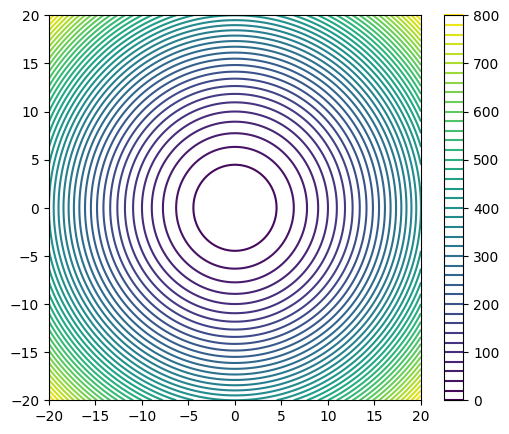

In [ ]:
def function_2d(x,y):
  return x**2 + y**2


x_range, y_range = np.linspace(-20, 20, 200), np.linspace(-20, 20, 200)
x, y = np.meshgrid(x_range, y_range)

z = function_2d(x, y)

fig, ax = plt.subplots(figsize=(6,5))
cont = ax.contour(x, y, z, levels=40)
fig.colorbar(cont, ax=ax)
plt.show()

Vamos a empezar en un punto cualquiera y, al igual que antes, calcularemos su gradiente (¡ojo, que ahora estamos en 2D!) y nos moveremos en la dirección opuesta.

In [ ]:
x_init, y_init = -15,15

learning_rate = 0.1

def gradient_2d(x,y):
  return 2*x, 2*y

**Ejercicio: Da un paso en la dirección opuesta al gradiente con el learning rate definido.**

In [ ]:
x_new = x_init - learning_rate*gradient_2d(x_init, y_init)[0]
y_new = y_init - learning_rate*gradient_2d(x_init, y_init)[1]

Vamos a visualizar lo que hemos hecho.

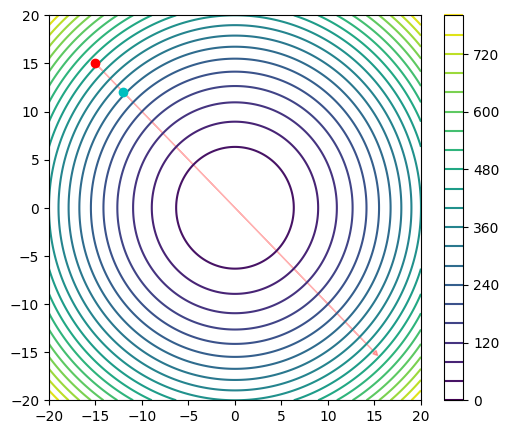

In [ ]:
fig, ax = plt.subplots(figsize=(6,5))
cont = ax.contour(x, y, z, levels=20)
fig.colorbar(cont, ax=ax)
ax.plot(x_init, y_init, 'ro')
plt.arrow(x_init, y_init, -float(gradient_2d(x_init, y_init)[0]), -float(gradient_2d(x_init, y_init)[1]), head_width=0.5, head_length=0.5, fc='r', ec='r', alpha=0.3)
ax.plot(x_new, y_new, 'co')
plt.show()

Igual que antes, podemos hacer un bucle para ir acercandonos.

In [ ]:
x_prueba, y_prueba = -20,20 # initial point

learning_rate = 0.1

new_x, new_y = [], []
new_x_fvalue, new_y_fvalue = [], []

distance_to_min = []

for i in range(50):
  f_value = function_2d(x_prueba, y_prueba)

  new_x.append(x_prueba)
  new_y.append(y_prueba)

  new_x_fvalue.append(f_value)

  d = np.sqrt(np.mean((x_prueba - 0)**2 + (y_prueba - 0)**2))
  distance_to_min.append(d)

  grad_x, grad_y = gradient_2d(x_prueba, y_prueba)

  x_prueba -= learning_rate*grad_x
  y_prueba -= learning_rate*grad_y


**Ejercicio: Representa como cambia la distancia al mínimo al pasar las iteraciones.**

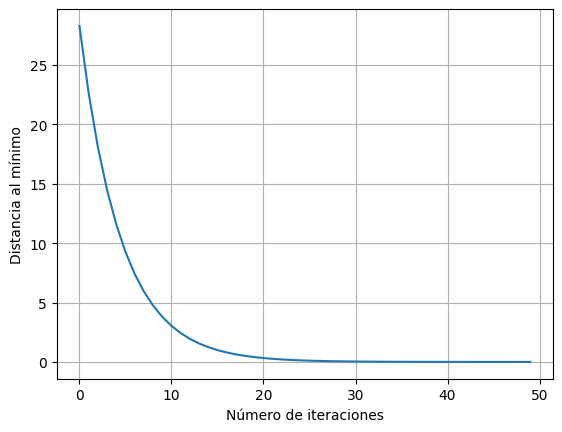

In [ ]:
plt.plot(np.arange(50), distance_to_min)
plt.xlabel('Número de iteraciones')
plt.ylabel('Distancia al mínimo')
plt.grid()
plt.show()

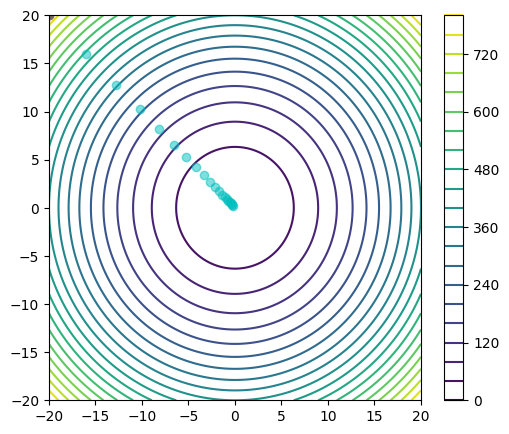

In [ ]:
fig, ax = plt.subplots(figsize=(6,5))
cont = ax.contour(x, y, z, levels=20)
fig.colorbar(cont, ax=ax)
ax.plot(-20, 20, 'ro')
for iter in range(len(new_x)):
  if iter<=20:
    ax.plot(new_x[iter], new_y[iter], 'co', alpha=0.5)
plt.show()

Se puede generalizar a todas las dimensiones que queramos, el gradiente tendrá tantas dimensiones como tengamos. Lo importante es moverse siempre en la dirección del gradiente y el sentido dependerá de si estamos máximizando o minimizando la función objetivo.

## 7. Obtención de parametros por descenso del gradiente

Vamos a ver como podemos aplicar todo lo anterior para definir un modelo y ajustarlo a unos datos!

En este caso vamos a hacer uno de los modelos más sencillos que existen, una regresión lineal. Al ser tan sencilla, podemos hacerlo de muchas formas distintas, vamos a verlo:

Pero primero vamos a generar los datos que vamos a querer ajustar con nuestra función.

In [12]:
x = np.random.uniform(0,1,20)

def f(x):
  return x*2 + 2

noise_variance =0.2
noise = np.random.randn(x.shape[0])*noise_variance
y = f(x) + noise

**Ejercicio: Representa los datos.**

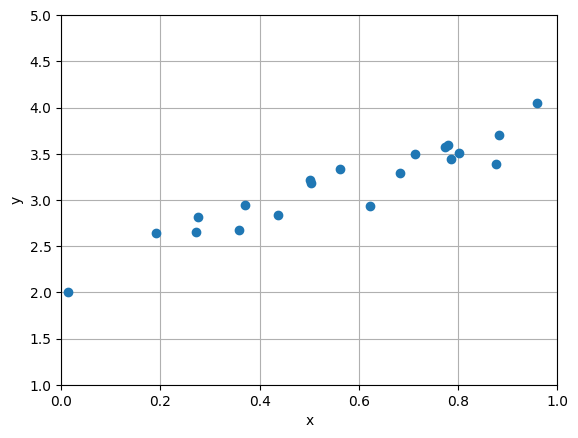

In [13]:
plt.plot(x, y, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim([0,1])
plt.ylim([1,5])
plt.grid()
plt.show()

#### 7.1 Regresión lineal analitica

En primer lugar vamos a resolver la regresión lineal analíticamente, ya que tiene solución fácil.

En nuestro caso, la ecuación es:

$$y = a_0 + a_1 x_1$$

Donde el parámetro $a_0$ es llamado el término constante o intercepto y el término $a_1$ es la pendiente de la recta. En forma matricial:

$$ \textbf{y}  = X \textbf{w}$$

Donde:

$$ \textbf{y} = \left( \begin{array}{c} y_1 \\ y_2 \\ \vdots \\ y_n \end{array} \right),
 X = \left( \begin{array}{c} 1 , x_{11} \\ 1  , x_{21} \\ \vdots \\ 1 , x_{n1} \end{array} \right),
 \textbf{w} = \left( \begin{array}{c} a_0 \\ a_1 \end{array} \right) $$

**Ejercicio: Prueba primero valores aleatorios para los parametros  $a_0$  y  $a_1$.**

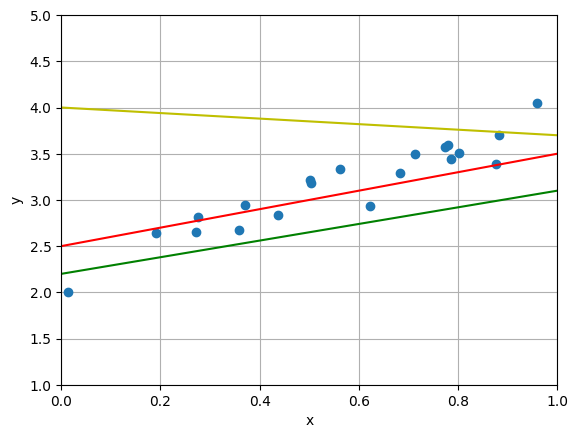

In [14]:
plt.plot(x, y, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim([0,1])
plt.ylim([1,5])
plt.grid()

# Podemos probar valores aleatorios de los parametros.
model1=[2.5 + 1*x_1 for x_1 in np.arange(-2,3)]
model2=[2.2 + 0.9*x_2 for x_2 in np.arange(-2,3)]
model3=[4.0 + -0.3*x_3 for x_3 in np.arange(-2,3)]
plt.plot(np.arange(-2,3), model1,'r')
plt.plot(np.arange(-2,3), model2,'g')
plt.plot(np.arange(-2,3), model3,'y')
plt.show()

En el caso de la regresión lineal, como es sencilla, se puede demostrar que para minimizar los errores cometidos (al cuadrado), la mejor solución es: $$W = (X^TX)^{-1}X^T y$$

**Ejercicio: Calcula estos valores ideales para los parametros.**

In [15]:
Y = y[:, np.newaxis]
X = np.vstack([x, np.ones(len(x))]).T

print(X.shape, Y.shape)

(20, 2) (20, 1)


In [16]:
best_w = np.linalg.inv(X.T @ X) @ X.T @ Y

print(best_w)

[[1.70541177]
 [2.19555642]]


**Ejercicio: Representa esta recta.**

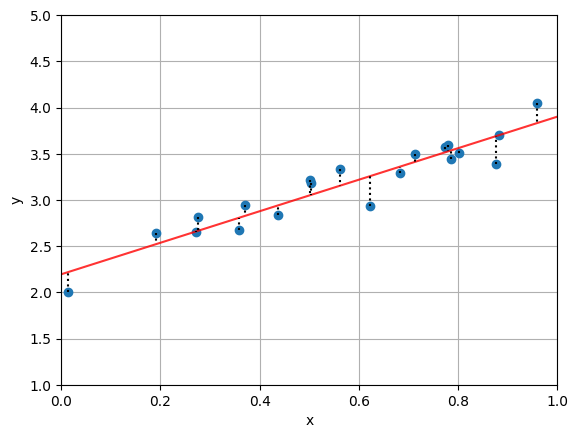

In [17]:
plt.plot(x, y, 'o')
model1=[best_w[1] + best_w[0]*x_1 for x_1 in np.arange(-2,3)]
plt.plot(np.arange(-2,3), model1,'r-', alpha=0.8)
for xi, yi in zip(x,y):
    plt.plot([xi, xi], [yi, best_w[1][0]+best_w[0][0]*xi], "k:")
plt.xlabel('x')
plt.ylabel('y')
plt.xlim([0,1])
plt.ylim([1,5])
plt.grid()

#### 7.2 Linear regresión con descenso por gradiente a mano

Vamos a generar unos datos que tengan un solo parámetro para que sea más sencillo de visualizar. Para ello únicamente hemos de imponer que el intercepto sea 0:

$$y = w_1x + w_0$$

Pasará a ser $y = wx$ al poner que $w_0 = 0$. En este caso vamos a generar los valores con $w = 2$:

In [18]:
def f(x):
  return x*2

x = np.random.uniform(0,1,20)
noise_variance = 0.2
noise = np.random.randn(x.shape[0])*noise_variance
y = f(x) + noise

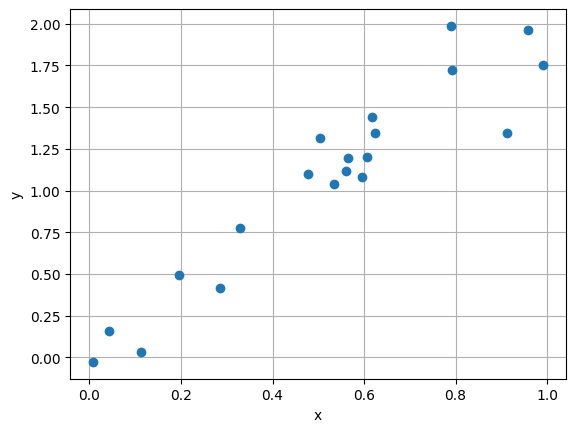

In [19]:
plt.plot(x, y, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

**Ejercicio: Define la función del error, que llamaremos cost, y que dados los valores reales ($y_{real}$) y predichos ($y_{pred}$), calcule la suma de errores al cuadrado.**

In [27]:
def cost(y_real, y_pred):
  return ((y_pred - y_real)**2).mean()

**Ejercicio: Representa como cambia el valor de esta función cost según el valor del parametro  $w$**

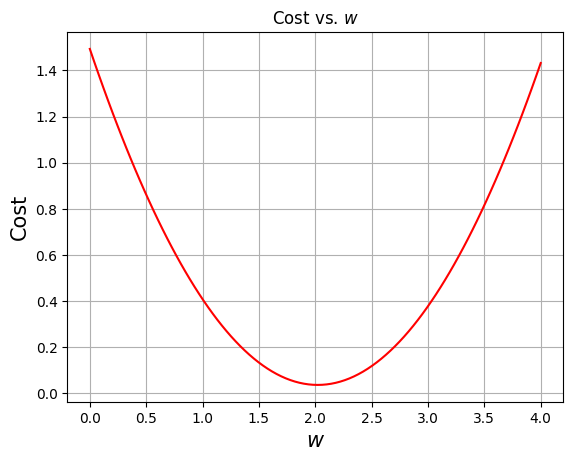

In [28]:
ws = np.linspace(0, 4, num=100)
cost_ws = np.zeros(ws.shape)

for ind,w in enumerate(ws):
    y_pred = x*w
    cost_ws[ind]=cost(y_pred, y)

plt.plot(ws, cost_ws, 'r-')
plt.xlabel('$w$', fontsize=15)
plt.ylabel('Cost', fontsize=15)
plt.title('Cost vs. $w$')
plt.grid()
plt.show()

Vemos que claramente el valor mínimo se da para $w=2$. Utilizar el descenso por gradiente aquí es exactamente igual que haciamos en el notebook anterior. La diferencia es que ahora estamos ajustando una función a nuestros datos y la función que estamos mínimizando es el error cometido al ajustar los datos.

Para poder hacerlo necesitamos la derivada de esta función respecto del parametro que queremos optimizar, en este caso $w$. Es un poco más complicada de calcular a mano, pero es así:

Nuestra función es:

$$f(y,x,w) = \sum (y - \hat{y})^2 = \sum (y - wx)^2$$

Tenemos que usar la regla de la cadena:

$$[f(g(x))]' = f'(g(x)) \cdot g(x)'$$

Por lo que:

$$\frac{\partial f}{\partial w} = \sum 2(y-wx) \cdot (-x) = \sum 2wx^2 - 2xy$$

**Ejercicio: Programa la función gradiente.**

In [29]:
def gradient_f(x,y,w):
    return np.sum(2*w*(np.array(x)**2) - 2*np.array(x)*np.array(y))

In [30]:
# Initial value for w
w = 0.1

# Learning rate
lr = 0.1

w_cost = [(w, cost(x*w, y))]
print(w_cost)

[(0.1, np.float64(1.3525181266610438))]


**Ejercicio: Completa el código para obtener el mejor valor posible de $W$. Prueba a cambiar el learning rate y a empezar desde un punto muy próximo a la solución.**

In [43]:
nb_of_iterations = 20

for i in range(nb_of_iterations):
    #1) Calcula el gradiente
    grad = gradient_f(x,y,w)

    #2) Da un paso en la dirección opuesta al gradiente
    w = w-grad*lr

    #3) Guarda el nuevo valor del parametro w y el error comido ahora
    w_cost.append((w,cost(x*w,y)))

for i in range(0, len(w_cost)):
    print('w({}): {:.4f} \t cost: {:.4f}'.format(i, w_cost[i][0], w_cost[i][1]))

w(0): 0.1000 	 cost: 1.3525
w(1): 2.8384 	 cost: 0.2749
w(2): 1.6741 	 cost: 0.0801
w(3): 2.1691 	 cost: 0.0449
w(4): 1.9586 	 cost: 0.0385
w(5): 2.0481 	 cost: 0.0374
w(6): 2.0101 	 cost: 0.0372
w(7): 2.0262 	 cost: 0.0371
w(8): 2.0194 	 cost: 0.0371
w(9): 2.0223 	 cost: 0.0371
w(10): 2.0210 	 cost: 0.0371
w(11): 2.0216 	 cost: 0.0371
w(12): 2.0213 	 cost: 0.0371
w(13): 2.0214 	 cost: 0.0371
w(14): 2.0214 	 cost: 0.0371
w(15): 2.0214 	 cost: 0.0371
w(16): 2.0214 	 cost: 0.0371
w(17): 2.0214 	 cost: 0.0371
w(18): 2.0214 	 cost: 0.0371
w(19): 2.0214 	 cost: 0.0371
w(20): 2.0214 	 cost: 0.0371
w(21): 2.0214 	 cost: 0.0371
w(22): 2.0214 	 cost: 0.0371
w(23): 2.0214 	 cost: 0.0371
w(24): 2.0214 	 cost: 0.0371
w(25): 2.0214 	 cost: 0.0371
w(26): 2.0214 	 cost: 0.0371
w(27): 2.0214 	 cost: 0.0371
w(28): 2.0214 	 cost: 0.0371
w(29): 2.0214 	 cost: 0.0371
w(30): 2.0214 	 cost: 0.0371
w(31): 2.0214 	 cost: 0.0371
w(32): 2.0214 	 cost: 0.0371
w(33): 2.0214 	 cost: 0.0371
w(34): 2.0214 	 cost: 0.

KeyboardInterrupt: 

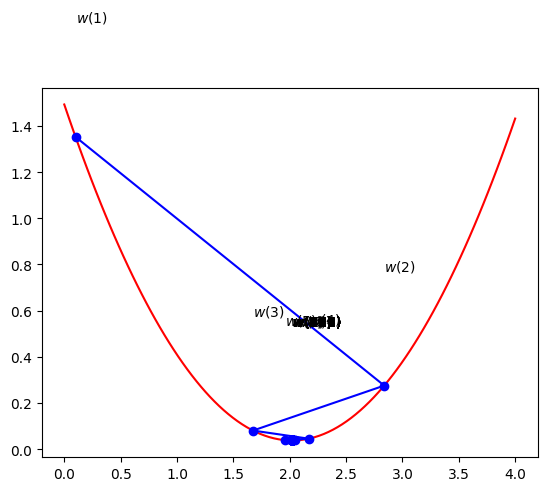

In [44]:
plt.plot(ws, cost_ws, 'r-')

for i in range(1, len(w_cost)-2):
    w1, c1 = w_cost[i-1]
    w2, c2 = w_cost[i]
    plt.plot(w1, c1, 'bo')
    plt.plot([w1, w2],[c1, c2], 'b-')
    plt.text(w1, c1+0.5, '$w({})$'.format(i))
    plt.draw()

w1, c1 = w_cost[len(w_cost)-3]
plt.plot(w1, c1, 'bo')
plt.text(w1, c1+0.5, '$w({})$'.format(nb_of_iterations))
plt.xlabel('$w$', fontsize=15)
plt.ylabel('$\\xi$', fontsize=15)
plt.title('Gradient descent updates plotted on cost function')
plt.grid()
plt.show()

**Ejercicio: Pinta en un mismo gráfico los puntos ajustados, la ecuación con la que los hemos generado y la solución obtenida por descenso por gradiente.**

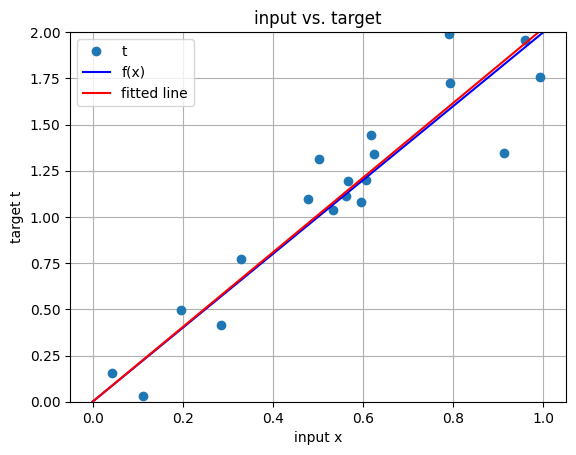

In [45]:
, c = w_cost[-1]
plt.plot(x, y, 'o', label='t')
plt.plot([0, 1], [f(0), f(1)], 'b-', label='f(x)')
plt.plot([0, 1], [0*w, 1*w], 'r-', label='fitted line') #our model: f_hat(x) = w*x
plt.xlabel('input x')
plt.ylabel('target t')
plt.ylim([0,2])
plt.title('input vs. target')
plt.grid()
plt.legend(loc=2)
plt.show()

En código, el descenso por gradiente en batch es algo así:

```python
nb_epochs = 100
for i in range(nb_epochs):
    grad = evaluate_gradient(target_f, data, w)
    w = w - learning_rate * grad
```

Durante un número de epocas predefinido, calculamos el vector gradiente de la función objetivo para todo el dataset respecto al vector de parametros.

El descenso por gradiente estocastico (Stochastic gradient descent o SGD) por contra actualiza los parametros para cada dato de entrenamiento:

```python
nb_epochs = 100
for i in range(nb_epochs):
    np.random.shuffle(data)
    for example in data:
        grad = evaluate_gradient(target_f, example, w)
        w = w - learning_rate * grad
```

por último, el descenso por gradiente en mini-batch (mini-batch gradient descent) coge lo mejor de ambos mundos, calculando el gradiente y actualizando los parametros para mini-batch de $n$ ejemplos de entrenamiento.

```python
nb_epochs = 100
for i in range(nb_epochs):
  np.random.shuffle(data)
  for batch in get_batches(data, batch_size=50):
    grad = evaluate_gradient(target_f, batch, w)
    w = w - learning_rate * grad
```


El mini-batch SGD tiene la ventaja de que trabaja con una estimación del gradiente ligeramente menos ruidosa. Sin embargo, a medida que aumenta el tamaño del batch, disminuye el número de actualizaciones realizadas por cada cálculo efectuado (al final se vuelve muy ineficiente, como el batch gradient descent).

Existe un punto óptimo (en términos de eficiencia computacional) que depende tanto de la distribución de los datos así como de la forma en que se implementen los cálculos.

#### 7.3 Regresión lineal con diferenciación automática

Volvemos al ejemplo con dos parámetros porque ahora no vamos a hacer los cálculos a mano, vamos a usar las librerias de diferenciación automática. En primer lugar volvemos a generar los datos.

In [46]:
x = np.random.uniform(0,1,20)

def f(x):
  return x*2 + 2

noise_variance =0.2
noise = np.random.randn(x.shape[0])*noise_variance
y = f(x) + noise

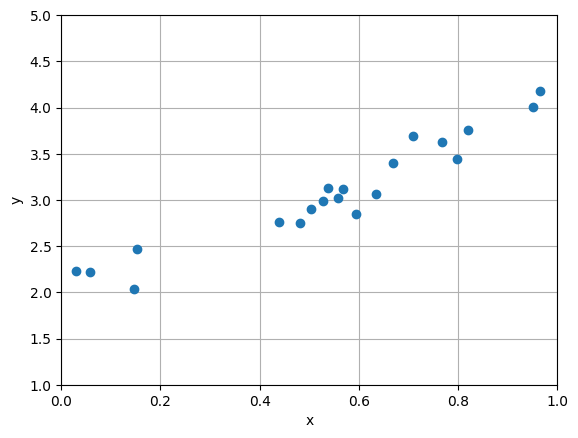

In [47]:
plt.plot(x, y, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim([0,1])
plt.ylim([1,5])
plt.grid()
plt.show()

Vamos a empezar usando Jax!

In [48]:
import jax

# data
x_jax = jax.numpy.array(x)
y_jax = jax.numpy.array(y)

# model parameters init values
w = 0.1
b = -0.1

Definimos nuestro modelo y la función de coste (error o distancia).

In [49]:
def model(w,b,x):
    return w * x + b

def loss(w,b,x,y_true):
    y_pred = model(w,b,x)
    return jax.numpy.mean(jax.numpy.square(y_true - y_pred))

learning_rate = 0.01

In [51]:
import time
start_time_jax = time.time()

for epoch in range(1000):
  loss_value = loss(w,b,x_jax,y_jax)
  dw, db = jax.grad(loss, argnums=(0,1))(w,b,x_jax,y_jax)
  w -= learning_rate * dw
  b -= learning_rate * db

  if epoch % 100 == 0:
    print(f"Epoch {epoch}: Loss = {loss_value}; w = {w}; b = {b}")

print('-----------------------------------------------------------')
print(f"Epoch {epoch}: Loss = {loss_value}; w = {w}; b = {b}")
print("--- %s seconds ---" % (time.time() - start_time_jax))

Epoch 0: Loss = 0.03120877780020237; w = 1.8716275691986084; b = 2.0670456886291504
Epoch 100: Loss = 0.03063972108066082; w = 1.8922690153121948; b = 2.0551505088806152
Epoch 200: Loss = 0.03018110804259777; w = 1.9107998609542847; b = 2.044471025466919
Epoch 300: Loss = 0.029811477288603783; w = 1.9274359941482544; b = 2.034883737564087
Epoch 400: Loss = 0.02951359562575817; w = 1.9423704147338867; b = 2.0262768268585205
Epoch 500: Loss = 0.02927352301776409; w = 1.9557777643203735; b = 2.0185508728027344
Epoch 600: Loss = 0.02908003330230713; w = 1.9678139686584473; b = 2.0116138458251953
Epoch 700: Loss = 0.02892409637570381; w = 1.9786187410354614; b = 2.0053870677948
Epoch 800: Loss = 0.028798429295420647; w = 1.9883193969726562; b = 1.9997966289520264
Epoch 900: Loss = 0.028697138652205467; w = 1.9970282316207886; b = 1.994777798652649
-----------------------------------------------------------
Epoch 999: Loss = 0.028616223484277725; w = 2.0047719478607178; b = 1.990314960479736

**Ejercicio: Vuelve a ejecutar solo la última celda. ¿Qué pasa?**

Para que veais como se haría, vamos a hacerlo tambien con algunas de las otras librerias de diferenciación automática. Vamos con Pytorch

In [52]:
import torch

# data
x_pytorch = torch.from_numpy(x)
y_pytorch = torch.from_numpy(y)

# model parameters init values
w = torch.tensor(0.1, requires_grad=True)
b = torch.tensor(-0.1, requires_grad=True)

Definimos nuestro modelo y la función de coste (ojo, tiene que estar programa usando funciones de pytorch o no podrá calcular el gradiente)

In [53]:
def model(x):
    return w * x + b

def loss_function(y_true, y_pred):
    return torch.mean((y_true - y_pred) ** 2)

Definimos el optimizador y el learning rate.

In [54]:
optimizer = torch.optim.SGD([w, b], lr=0.01)

Hacemos el entrenamiento!

In [55]:
start_time_pyt = time.time()

for epoch in range(1000):
  y_pred = model(x_pytorch)
  loss = loss_function(y_pytorch, y_pred)
  loss.backward()
  optimizer.step()
  optimizer.zero_grad()

  if epoch % 100 == 0:
    print(f"Epoch {epoch}: Loss = {loss.detach().numpy()}; w = {w.detach().numpy()}; b = {b.detach().numpy()}")

print('-----------------------------------------------------------')
print(f"Epoch {epoch}: Loss = {loss.detach().numpy()}; w = {w.detach().numpy()}; b = {b.detach().numpy()}")
print("--- %s seconds ---" % (time.time() - start_time_pyt))

Epoch 0: Loss = 10.080569376988276; w = 0.13689188659191132; b = -0.037465617060661316
Epoch 100: Loss = 0.09742513890165559; w = 1.4469411373138428; b = 2.095433473587036
Epoch 200: Loss = 0.04498674763036909; w = 1.588515281677246; b = 2.2151224613189697
Epoch 300: Loss = 0.0415544111126478; w = 1.6435091495513916; b = 2.1974587440490723
Epoch 400: Loss = 0.03897680020995851; w = 1.687853455543518; b = 2.1728806495666504
Epoch 500: Loss = 0.03690025074937588; w = 1.7273142337799072; b = 2.150207281112671
Epoch 600: Loss = 0.03522671484448113; w = 1.7627151012420654; b = 2.1298112869262695
Epoch 700: Loss = 0.03387792892584879; w = 1.7944942712783813; b = 2.111497163772583
Epoch 800: Loss = 0.03279090969893049; w = 1.8230233192443848; b = 2.0950562953948975
Epoch 900: Loss = 0.03191483732520608; w = 1.848634958267212; b = 2.080296277999878
-----------------------------------------------------------
Epoch 999: Loss = 0.031215120145956825; w = 1.871409296989441; b = 2.067171573638916
--

Y con TensorFlow:

In [57]:
!pip install tensorflow

  Using cached wheel-0.45.1-py3-none-any.whl.metadata (2.3 kB)
   ---------------------------------------- 0.0/332.0 MB ? eta -:--:--
   - -------------------------------------- 9.2/332.0 MB 48.0 MB/s eta 0:00:07
   - -------------------------------------- 16.3/332.0 MB 42.5 MB/s eta 0:00:08
   --- ------------------------------------ 26.7/332.0 MB 44.3 MB/s eta 0:00:07
   ---- ----------------------------------- 37.5/332.0 MB 46.2 MB/s eta 0:00:07
   ----- ---------------------------------- 47.4/332.0 MB 46.8 MB/s eta 0:00:07
   ------ --------------------------------- 57.9/332.0 MB 47.4 MB/s eta 0:00:06
   ------- -------------------------------- 66.3/332.0 MB 47.0 MB/s eta 0:00:06
   -------- ------------------------------- 71.3/332.0 MB 43.7 MB/s eta 0:00:06
   --------- ------------------------------ 76.3/332.0 MB 41.4 MB/s eta 0:00:07
   --------- ------------------------------ 82.1/332.0 MB 39.9 MB/s eta 0:00:07
   ---------- ----------------------------- 87.0/332.0 MB 38.4 MB/s

In [58]:
import tensorflow as tf

# data
x_tensorflow = tf.constant(x, dtype=tf.float32)
y_tensorflow = tf.constant(y, dtype=tf.float32)

# model parameters init values
w = tf.Variable(0.1, name='w')
b = tf.Variable(-0.1, name='b')

Recordad definir el modelo y la función de coste con las funciones de la misma libreria que esteis usando!

In [59]:
def model(x):
    return w * x + b

def loss(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

Definimos el optimizador y el learning rate.

In [60]:
optimizer = tf.optimizers.SGD(learning_rate=0.01)

Hacemos el entrenamiento

In [61]:
start_time_tf = time.time()

for epoch in range(1000):
  with tf.GradientTape() as tape:
    y_pred = model(x_tensorflow)
    loss_value = loss(y_tensorflow, y_pred)

  gradients = tape.gradient(loss_value, [w, b])
  optimizer.apply_gradients(zip(gradients, [w, b]))
  if epoch % 100 == 0:
    print(f"Epoch {epoch}: Loss = {loss_value.numpy()}; w = {w.numpy()}; b = {b.numpy()}")

print('-----------------------------------------------------------')
print(f"Epoch {epoch}: Loss = {loss_value.numpy()}; w = {w.numpy()}; b = {b.numpy()}")
print("--- %s seconds ---" % (time.time() - start_time_tf))

Epoch 0: Loss = 10.08056926727295; w = 0.13689188659191132; b = -0.037465617060661316
Epoch 100: Loss = 0.09742512553930283; w = 1.4469411373138428; b = 2.095433473587036
Epoch 200: Loss = 0.04498675465583801; w = 1.588515281677246; b = 2.2151224613189697
Epoch 300: Loss = 0.04155441001057625; w = 1.6435091495513916; b = 2.1974587440490723
Epoch 400: Loss = 0.03897680342197418; w = 1.687853455543518; b = 2.1728806495666504
Epoch 500: Loss = 0.036900244653224945; w = 1.7273143529891968; b = 2.150207281112671
Epoch 600: Loss = 0.03522671014070511; w = 1.762715220451355; b = 2.1298112869262695
Epoch 700: Loss = 0.03387792035937309; w = 1.794494390487671; b = 2.111497163772583
Epoch 800: Loss = 0.032790910452604294; w = 1.8230233192443848; b = 2.0950562953948975
Epoch 900: Loss = 0.031914837658405304; w = 1.848634958267212; b = 2.080296277999878
-----------------------------------------------------------
Epoch 999: Loss = 0.0312151201069355; w = 1.871409296989441; b = 2.067171573638916
---

**Ejercicio: Re-ejecuta este último apartado (diferenciación automática) cambiando el entorno de ejecución a acelerado por GPU. ¿Qué pasa?**

#### 7.4 Regresión lineal con datos reales

In [ ]:
from sklearn import datasets
import pandas as pd
import seaborn as sns

In [ ]:
datos_house = datasets.fetch_california_housing()

print(datos_house['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [ ]:
X_house, y_house = datos_house.data, datos_house.target

print('Shape of data:', X_house.shape, y_house.shape)

Shape of data: (20640, 8) (20640,)


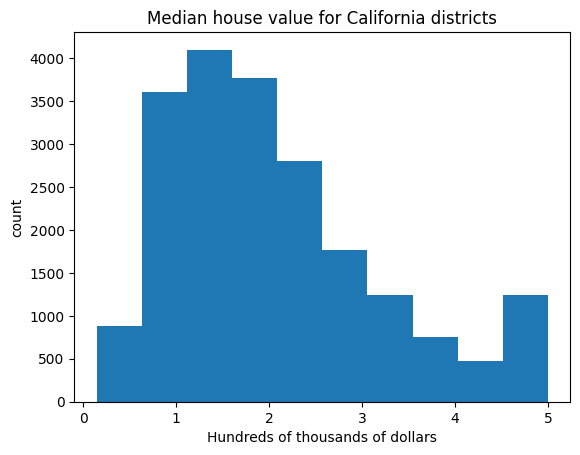

In [ ]:
plt.hist(y_house)
plt.title('Median house value for California districts')
plt.xlabel('Hundreds of thousands of dollars')
plt.ylabel('count')
plt.show()

**Ejercicio: Pasa los datos a un dataframe de pandas.**

In [ ]:
house_df = pd.DataFrame(data=datos_house.data, columns=datos_house.feature_names)
print(house_df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  


In [ ]:
house_df['price'] = datos_house.target

In [ ]:
print(house_df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  price  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  


La función lmplot de seaborn nos permite hacer gráficos a la vez que ajusta funciones a nuestros datos!

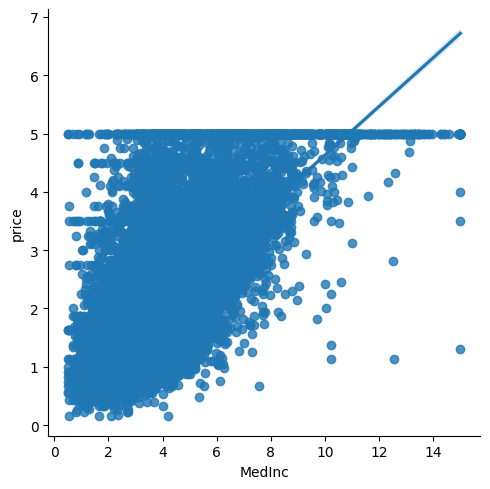

In [ ]:
import seaborn as sns
sns.lmplot(data=house_df, x="MedInc", y="price")
plt.show()

Recordad que tenemos ya los datos y la variable a predecir separada:

In [ ]:
X_house, y_house = datos_house.data[:,:6], datos_house.target

print('Shape of data:', X_house.shape, y_house.shape)

Shape of data: (20640, 6) (20640,)


Normalmente siempre hay que nromalizar y separar los datos.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_house = scaler.fit_transform(X_house)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_house, y_house, test_size=0.2, random_state=123)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(16512, 6) (16512,)
(4128, 6) (4128,)


Vamos con Jax

In [ ]:
# data
X_train_jax = jax.numpy.array(X_train)
X_test_jax = jax.numpy.array(X_test)
y_train_jax = jax.numpy.array(y_train)
y_test_jax = jax.numpy.array(y_test)

w = np.ones(X_train_jax.shape[1:])

In [ ]:
print(w.shape)

(6,)


In [ ]:
import jax.numpy as jnp

def model(w,x):
    return jnp.dot(x,w)

def loss(w,x,y_true):
    y_pred = model(w,x)
    return jax.numpy.sqrt(jax.numpy.mean(jax.numpy.square(y_true - y_pred)))

learning_rate = 0.001

In [ ]:
start_time_jax = time.time()

loss_train, loss_test = [], []

for epoch in range(4000):
  loss_value = loss(w,X_train_jax,y_train_jax)
  dw = jax.grad(loss, argnums=(0,1))(w,X_train_jax,y_train_jax)
  w -= learning_rate * dw[0]

  if epoch % 100 == 0:
    print(f"Epoch {epoch}: Loss = {loss_value}; w = {w}")
    loss_value = loss(w,X_train_jax,y_train_jax)
    loss_train.append(loss_value)
    loss_value_test = loss(w,X_test_jax,y_test_jax)
    loss_test.append(loss_value_test)
    print(f"    Test Loss = {loss_value_test}")
    print('\n')

finish_time_jax = time.time()

Epoch 0: Loss = 3.284165859222412; w = [0.99988544 0.9999213  0.9994306  0.99944615 0.9998017  0.999643  ]
    Test Loss = 3.0536108016967773


Epoch 100: Loss = 3.204702377319336; w = [0.9886945  0.9917717  0.94347334 0.94503486 0.9799146  0.96409976]
    Test Loss = 2.9916176795959473


Epoch 200: Loss = 3.1297497749328613; w = [0.9780348  0.98308104 0.8895002  0.8925864  0.9599399  0.9288996 ]
    Test Loss = 2.9332919120788574


Epoch 300: Loss = 3.059281587600708; w = [0.96791095 0.97386885 0.8375524  0.8421446  0.9399071  0.8940984 ]
    Test Loss = 2.878582000732422


Epoch 400: Loss = 2.993242025375366; w = [0.9583247  0.9641584  0.78766197 0.7937442  0.9198473  0.859752  ]
    Test Loss = 2.827413558959961


Epoch 500: Loss = 2.9315476417541504; w = [0.94927514 0.9539759  0.7398505  0.74741024 0.8997933  0.8259153 ]
    Test Loss = 2.779693603515625


Epoch 600: Loss = 2.8740899562835693; w = [0.9407587  0.9433508  0.69413066 0.70315677 0.8797778  0.79264206]
    Test Loss = 2

Unas buenas curvas de aprendizaje son lo que nos indica que el modelo es bueno.

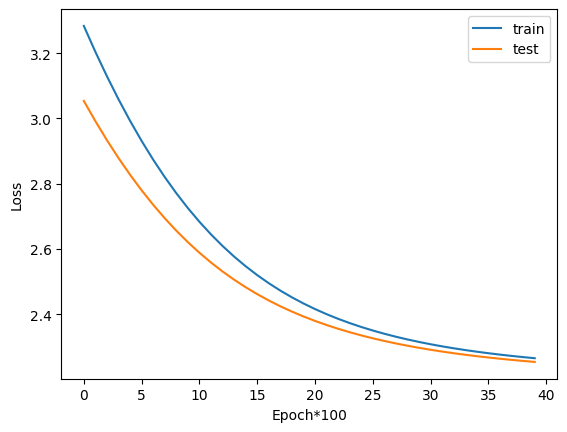

In [ ]:
plt.plot(loss_train, label='train')
plt.plot(loss_test, label='test')
plt.xlabel('Epoch*100')
plt.ylabel('Loss')
plt.legend()
plt.show()

Al ser una regresión lineal, podemos utilizar los pesos aprendidos para saber que variables son más importantes a la hora de predecir el valor de las casas.

In [ ]:
print(w)

[0.85213435 0.5395087  0.03436912 0.10454237 0.36270595 0.11579678]


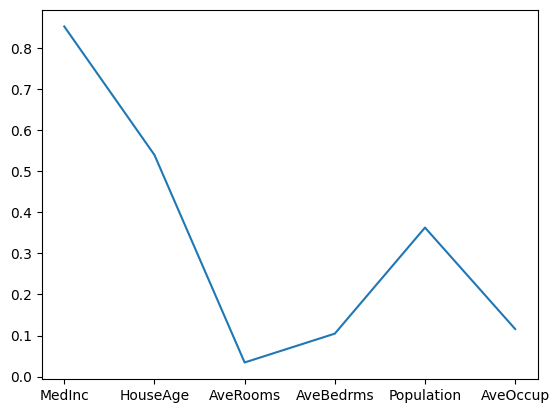

In [ ]:
plt.plot(np.arange(len(w)), w)
plt.xticks(np.arange(len(w)), datos_house.feature_names[:-2])
plt.show()